In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
PATH = '/content/StudentsPerformance.csv'
raw_df = pd.read_csv(PATH)
df = raw_df
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print("Null Values Count")
df.isna().sum()

Null Values Count


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
print("Duplicate Rows : ", df.duplicated().sum())

Duplicate Rows :  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


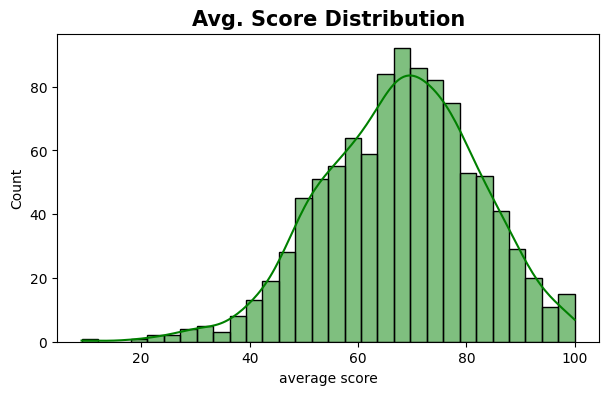

In [ ]:
# Adding column of Average Score

df['average score'] = (df['math score']+df['reading score']+df['writing score']) / 3
df.head()

plt.figure(figsize=(7,4))

plt.title('Avg. Score Distribution', fontsize=15, fontweight='bold')
sns.histplot(data=df, x='average score',bins=30,kde=True,color='g')


plt.show()


In [ ]:
gender_group = df.groupby('gender').mean()
gender_group

<ipython-input-10-3625fa3224de>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


,math score,reading score,writing score,average score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


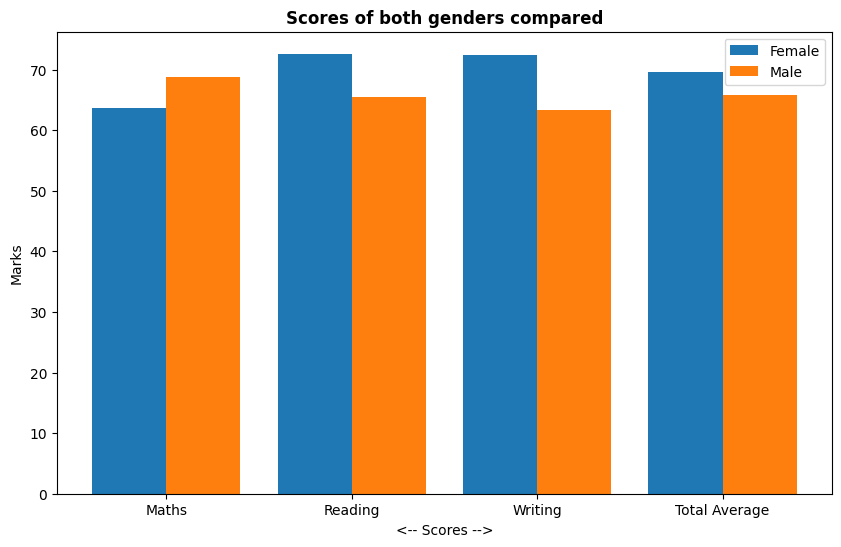

In [ ]:
plt.figure(figsize=(10, 6))


X = ['Maths','Reading','Writing','Total Average']
Ygirls = gender_group.values[0]
Zboys = gender_group.values[1]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Male')
  
plt.xticks(X_axis, X)
plt.xlabel("<-- Scores -->")
plt.ylabel("Marks")
plt.title("Scores of both genders compared", fontweight='bold')
plt.legend()
plt.show()

<ipython-input-12-1c2eebda2d5f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(8,6))


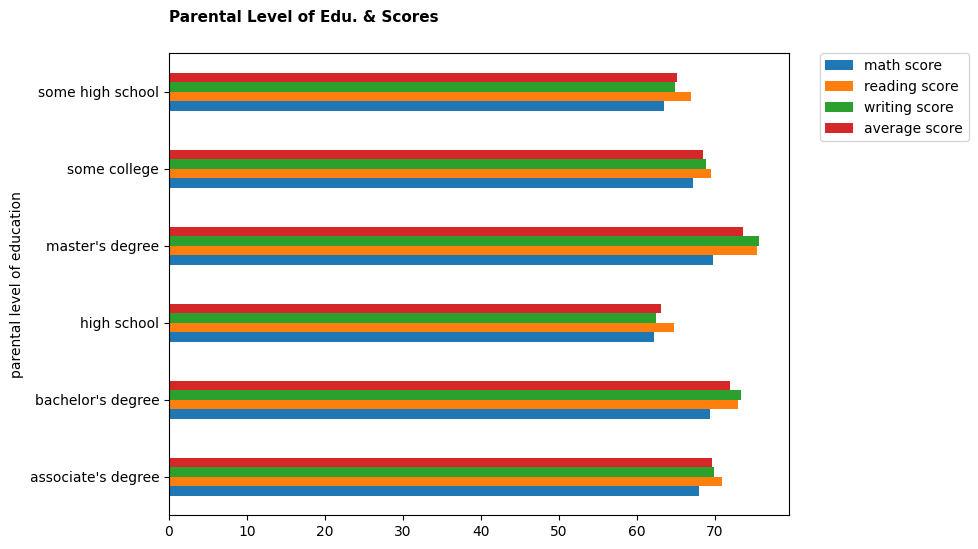

In [ ]:
#agg()allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame
#default 0, which is the index (row) axis.
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(8,6))
#bbox_to_anchor,loc and borderaxespad change location of the legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#y for the location of title
plt.title('Parental Level of Edu. & Scores', fontsize=11, fontweight=600,y=1.05,loc="left")

plt.show()

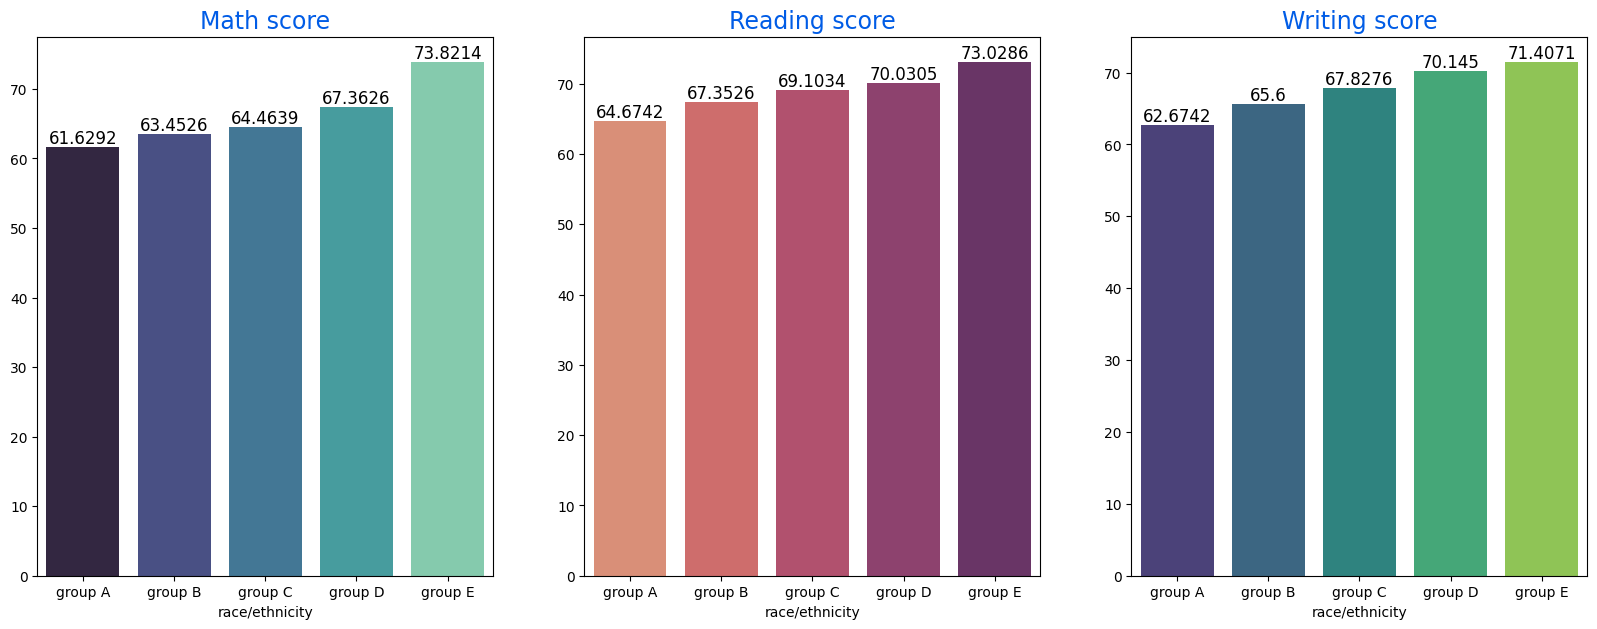

In [ ]:
Group_data2=df.groupby('race/ethnicity')
#The subplot() function takes three arguments that describes the layout of the figure.
#if the number 3 changed to 2 we need to remove one of the barplot 
f,ax=plt.subplots(1,3,figsize=(20,7))
#palette RGB color strings
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=17)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=17)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=12)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'viridis',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=17)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=12)

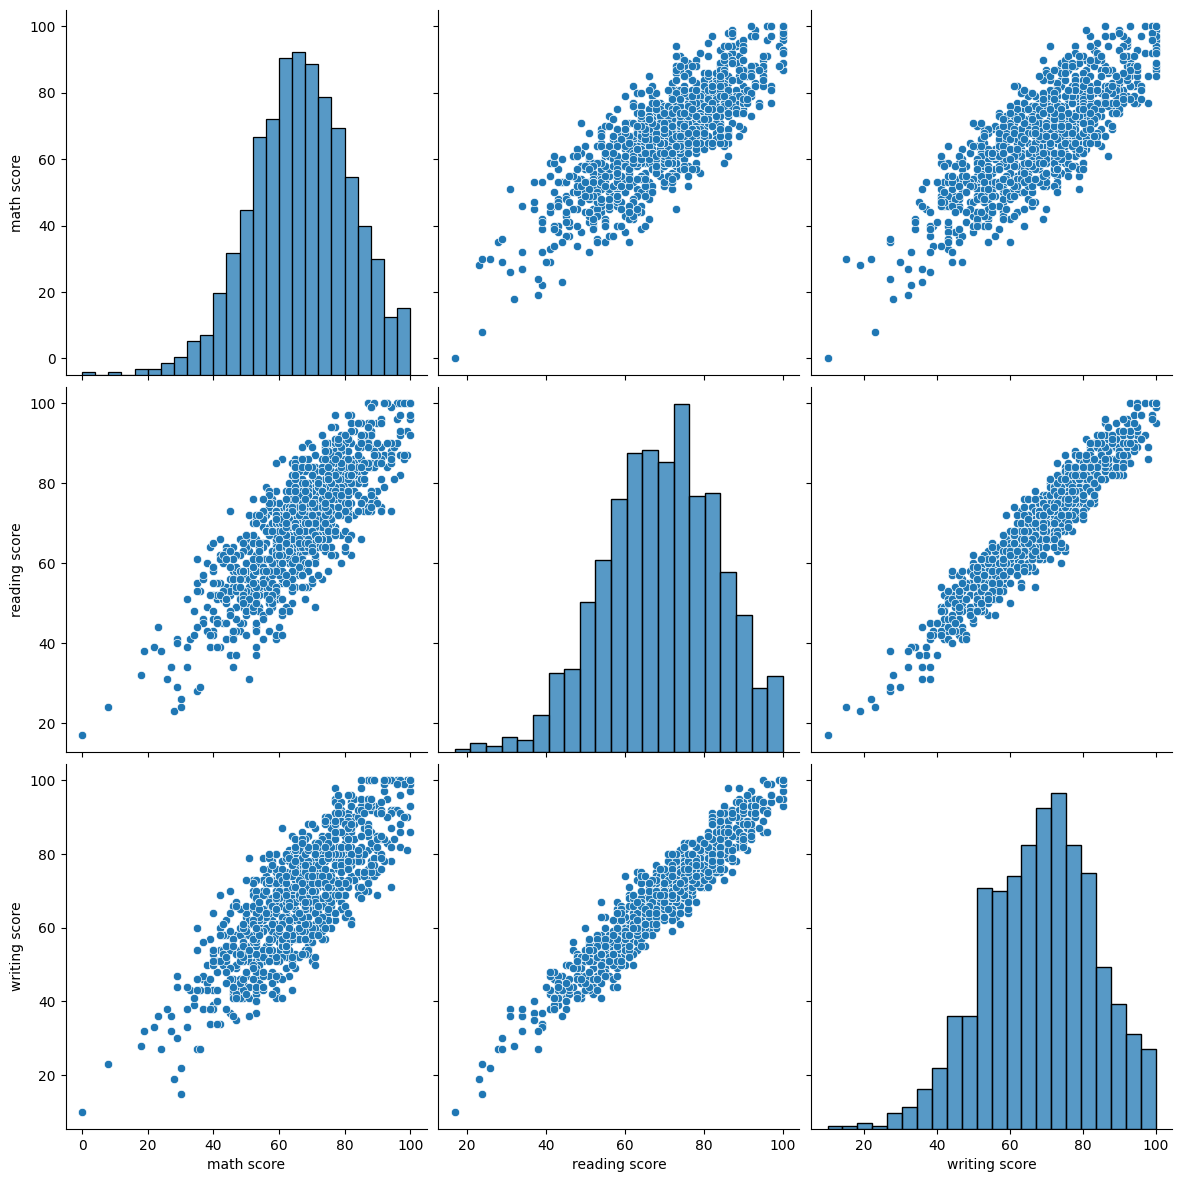

In [ ]:
sns.pairplot(data=df[['math score', 'reading score', 'writing score']], height = 4)

In [ ]:
!pip install sklearn
!pip install svm
!pip install libsvm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=073dd63fa5a39afd0f249273f87b1aaa9eb9c1747754aa2ccadf2c51aaa249a3
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for svm: filename=svm-0.1.0-py3-none-any.whl size=3481 sha256=ad8ba70f560bd9a28db390877245f9705a402a497f68343f017cd900c39f4dd3
  Stored in directory: /root/.cache/pip/wheels/dc/0a/16/c3cfc069f00231db8d16bc70bc747c155395dbd30843a61957
Successfully built svm
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def ScoreMark(score):
    if ( score > 90 ):
        mark = 'A'
    elif ( score > 80):
        mark = 'B'
    elif ( score > 70):
        mark = 'C'
    elif ( score > 60):
        mark = 'D'
    elif ( score > 50):
        mark = 'E'
    else: 
        mark = 'F'
    return mark
#The lambda function is used to apply this process to all values in the "math score", "reading score", and "writing score" columns, 
#respectively. The lambda function helps in quickly creating an anonymous function without the need to define a separate function each time
df['math mark'] = df['math score'].apply(lambda s: ScoreMark(s))
df['reading mark'] = df['reading score'].apply(lambda s: ScoreMark(s))
df['writing mark'] = df['writing score'].apply(lambda s: ScoreMark(s))

In [ ]:
def getMarkData(dt, marks):
    subDt = dt[(dt['math mark'].isin(marks)) | (dt['reading mark'].isin(marks)) | (dt['writing mark'].isin(marks))]
    return subDt
    #shape[0] method to count the number of rows in each sub-DataFrame that contains a specific mark in the "math mark",
    # "reading mark", or "writing mark" columns. The counts for each subject are printed to the console.
def MarkCounts(dt, marks):
    subDt = getMarkData(dt, marks)
    print('Math: ' + str(subDt[subDt['math mark'].isin(marks)].shape[0])
      , '\n'
      , 'Writing: ' + str(subDt[subDt['writing mark'].isin(marks)].shape[0])
      , '\n'
      , 'Reading: ' + str(subDt[subDt['reading mark'].isin(marks)].shape[0])
      , '\n'
      , '\n'
      , 'Math and Reading: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['reading mark'].isin(marks))].shape[0])
      , '\n'
      , 'Math and Writing: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      ,'Reading and Writing: ' + str(subDt[(subDt['reading mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      , '\n',
      'All: '+str(subDt[(subDt['math mark'].isin(marks))&(subDt['reading mark'].isin(marks))&(subDt['writing mark'].isin(marks))].shape[0])
     )

In [ ]:
print('F')
MarkCounts(df, ['F'])
print('\n A')
MarkCounts(df, ['A'])

F
Math: 150 
 Writing: 124 
 Reading: 97 
 
 Math and Reading: 66 
 Math and Writing: 78 
 Reading and Writing: 85 
 
 All: 62

 A
Math: 50 
 Writing: 68 
 Reading: 62 
 
 Math and Reading: 26 
 Math and Writing: 28 
 Reading and Writing: 46 
 
 All: 23


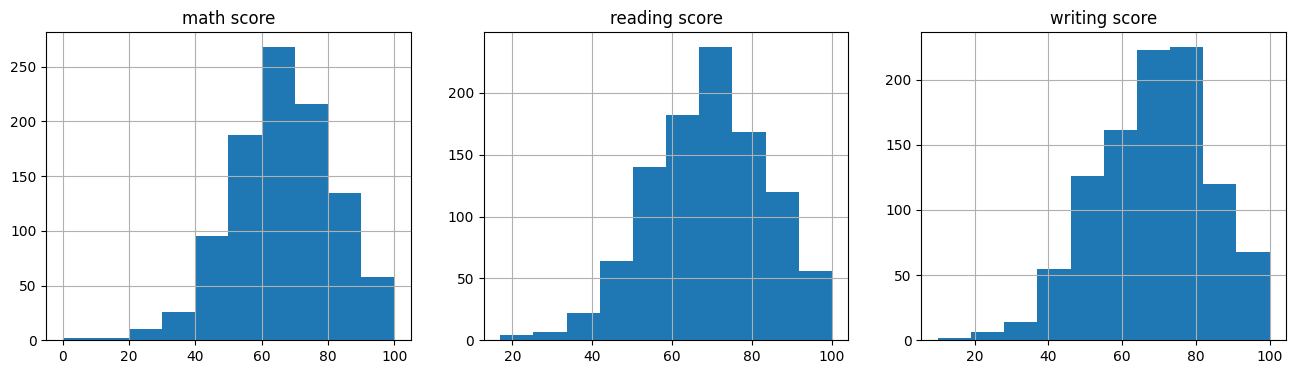

In [ ]:
figure = plt.figure(figsize=(16,4))
n = 1
for i in ['math score', 'reading score', 'writing score']:
    ax = figure.add_subplot(1, 3, n)
    ax.set_title(i)
    df[i].hist()
    n = n + 1

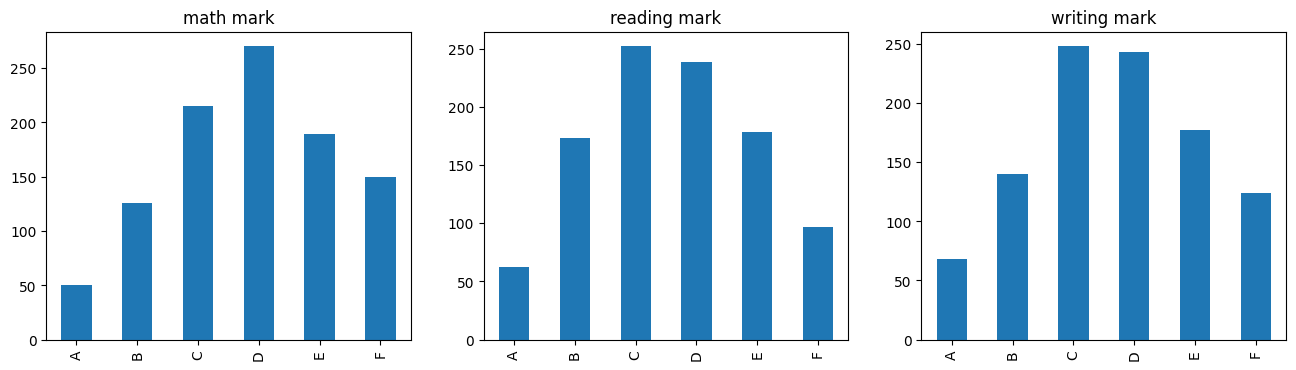

In [ ]:
figure = plt.figure(figsize=(16,4))
n = 1
for i in ['math mark', 'reading mark', 'writing mark']:
    ax = figure.add_subplot(1, 3, n)
    ax.set_title(i)
    df[i].value_counts().sort_index().plot(kind="bar")
    n = n + 1

In [ ]:
def hasFailed(dt):
    if ((dt['math mark'] == 'F') | (dt['reading mark'] == 'F') | (dt['writing mark'] == 'F')):
        return 1
    else:
        return 0
df['failed'] = df.apply(hasFailed, axis=1)

In [ ]:
classification_data = df[[
                              'gender'
                            , 'race/ethnicity'
                            , 'parental level of education'
                            , 'lunch'
                            , 'test preparation course'
                            , 'failed'
                           ]]

In [ ]:
text_columns = [
  'gender'
, 'race/ethnicity'
, 'parental level of education'
, 'lunch'
, 'test preparation course'] 
#pd.get_dummies() function. One-hot encoding is a process of converting categorical features into binary features, 
#where each category is transformed into a new column and assigned either 0 or 1 based on whether or not it is present in the original data.
classification_data = pd.get_dummies(classification_data, columns=text_columns)
classification_data.head(6)

,failed,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1


In [ ]:
#Splitting data into main training and validation datasets, 80/20
#The reset_index method is first used to reset the index of the classification_data dataframe
classification_data.reset_index(level=[0], inplace=True)
#the sample method is used to randomly sample 80% of the rows from classification_data to create data_train, 
#while the remaining 20% of the rows make up data_val. 
#The shape of the resulting data_train dataframe is printed, 
#showing the number of rows with a failed value of 0 and 1, as well as the shape of the data_val dataframe.
data_train = classification_data.sample(int(np.floor(classification_data.shape[0] * 0.8)), random_state=999)
data_val = classification_data[np.logical_not(classification_data['index'].isin(data_train['index']))]
data_train = data_train.drop(columns = ['index'])
data_val = data_val.drop(columns = ['index'])
print(data_train[data_train['failed'] == 0].shape
    , data_train[data_train['failed'] == 1].shape
     , data_val.shape)

(648, 18) (152, 18) (200, 18)


In [ ]:
#Oversampling: ge the needed oversample values

data_train_fail = data_train[data_train['failed'] == 1]
data_train_pass = data_train[data_train['failed'] == 0]

pass_n = data_train[data_train['failed'] == 0].shape[0]
fail_n = data_train[data_train['failed'] == 1].shape[0]
times_x = np.floor(pass_n / fail_n)
diff = int(pass_n - times_x * fail_n)

print(times_x, diff)

4.0 40


In [ ]:
#Oversampling: concatenating oversampled data together.
data_train_over = pd.concat([data_train_pass, 
                            data_train_fail,
                            data_train_fail,
                            data_train_fail,
                            data_train_fail,
                            data_train_fail.sample(diff, random_state = 999)])
print(data_train_over[data_train_over['failed'] == 0].shape
    , data_train_over[data_train_over['failed'] == 1].shape
     , data_train_over.shape)

(648, 18) (648, 18) (1296, 18)


In [ ]:
#test_train_sample
#Split arrays or matrices into random train and test subsets.Quick utility that wraps input validation,
X_train, X_test, y_train, y_test = train_test_split(
    data_train_over[data_train_over.columns.difference(['failed'])],
    data_train_over['failed'], test_size=0.3, random_state=999)

In [ ]:

# Decision Tree
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(X_train, y_train)



In [ ]:

acc = accuracy_score(y_test, dt.predict(X_test))


print(
     '\n decision tree', acc,
     
)


 decision tree 0.712082262210797


In [ ]:
#difference()Return a new Index with elements of index not in other.This is the set difference of two Index objects
val_x = data_val[data_val.columns.difference(['failed'])]
val_y = data_val['failed']
train_x = data_train[data_train.columns.difference(['failed'])]
train_y = data_train['failed']


print('decision tree', accuracy_score(val_y, 
               DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(train_x, train_y).predict(val_x)))


decision tree 0.715


In [ ]:
from sklearn.metrics import confusion_matrix


print(' \n Decision Tree')
y_pred = DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))




 
 Decision Tree
Confusion matrix:
[[137  11]
 [ 46   6]]
True Negative: 137 , False Positive: 11 , False Negative: 46 , True Positive: 6
